<a href="https://colab.research.google.com/github/YgorLourenco/Meu-Protfolio-Data-Science/blob/main/%5BPROJETO%5D_Doen%C3%A7as_Cardiovasculares_no_Mundo_e_no_Brasil_v2(18_09_2021).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Minha logo" width="100%" src="https://i.imgur.com/Zk6Fjo1.jpg">

# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças comoangina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/396260-PCIO15-306.jpg"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.



## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)

Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [ ]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [ ]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [ ]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

In [ ]:
# Verificar o estado dos valores nulos e tipos de valores contidos no conjunto daddos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


## Minha Análise Exploratória de Dados

* Ver o tamanho do df (shape)
* Ver a descrição estatística do df (describe)
* Ver os tipos das variáveis do df (dtypes)
* Ver as 5 primeiras entradas do df (head)
* Contar quantos valores "não há doença cardíaca" (0) e "há doença cardíaca" (1) existem no *dataset* (value_counts)
* Ver valores ausentes do df (isnull().sum())
* Plotar o gráfico de linha para df_brasil
* Plotar o gráfico de barras para ver a quantidade de homens e mulheres em df
* Plotar o gráfico de dispersão para as variáveis `age` e `chol`
* plotar um histograma para o colesterol sérico
* plotar um gráfico de pizza para `restecg`
* Plotar um *heatmap* com as correlações

NÃO escreve apenas código. Um projeto ou relatório é para fornecer insumos e informações para alguém. SEMPRE documente, escreva e formule suas hipóteses. Você NÃO está escrevendo para outro programador ler. Você está preparando um relatório para os Diretores de nível estratégico de uma empresa.


In [ ]:
# 1 - Tamanho do conjunto de dados
print('Linhas:', df.shape[0])
print('Colunas:', df.shape[1])

Linhas: 303
Colunas: 14


In [ ]:
# 2 - Descrição estatistica 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
# 3 - Tipo das variaveis
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [ ]:
# 4 - 5 primeiras entradas
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Perguntas sobre o conjunto de dados sobre Doenças Cardiovasculares

### ** 01 - Qual a quantidade de pessoas que possuem ou não doenças cardiacas?**

In [ ]:
# 5 - Contar quantos valores "não há doença cardíaca" (0) e "há doença cardíaca" (1) existem no dataset (value_counts)
print("A quantidade de pessoas que não possuem doenças cardiacas são 0:\t{} ({:.2f}%)".format(df.num.loc[df["num"] == 0].value_counts()[0], 100*df.num.loc[df["num"] == 0].value_counts()[0] / df.shape[0]))
print("A quantidade de pessoas que possuem doença cardiacas são 1:\t{} ({:.2f}%)".format(df.num.loc[df["num"] == 1].value_counts()[1], 100*df.num.loc[df["num"] == 1].value_counts()[1] / df.shape[0]))

A quantidade de pessoas que não possuem doenças cardiacas são 0:	164 (54.13%)
A quantidade de pessoas que possuem doença cardiacas são 1:	139 (45.87%)


In [ ]:
# 6 - Ver valores ausentes do df (isnull().sum())
# print("{:.2f}%".format(df.isnull().sum() / df.shape[0]))
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### ** 02 - Como esta a têndencia de mortes por doenças cardiovasculares ao longo dos anos no Brasil?** 

Têndencia de mortes no ano de 2004 a 2018

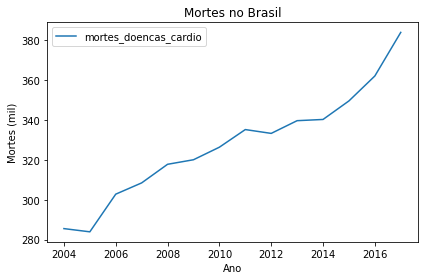

In [ ]:
# 7 - Plotar o gráfico de linha para df_brasil
fig, ax = plt.subplots()
df_brasil.plot('ano','mortes_doencas_cardio', ax=ax)
ax.set_title("Mortes no Brasil")
ax.set_xlabel('Ano')
ax.set_ylabel('Mortes (mil)')
plt.tight_layout()

**O que se entende do grafico de linha plotado acima?**

A conclusão que se entende do grafico em um espaço de tempo de 2004 a 2016, e que após a contagem de mortes de doenças cardio vasculares em 2004, houve um aumento vertiginoso em 2006 e continuou a crescer até o ano de 2016. Onde em 2014 para 2016, este aumento foi o maior de todos. Isso corrobora com a tese de que as doenças cardiovasculares, estão vitimando ainda mais brasileiros e deveria se tornar um dos focos da saúde pública do país. 

### ** 03 - Quais são os motivos que mais matam brasileiros por doenças cardiovasculares?**

As 5 doenças que mais causam mortes

In [ ]:
df_brasil_causas = pd.read_csv("https://raw.githubusercontent.com/YgorLourenco/Data-Scienece-na-Pratica---Sigmoidal---MOD-03---Matplotlib/master/mortes_causas_brasil_v3.csv")
df_brasil_causas.nlargest(5, 'TOTAL DE ÓBITOS')

,GRUPO DE CAUSAS,TOTAL DE ÓBITOS
4,Neoplasias,1899311
5,Externas,1538892
6,Respiratórias,1276345
1,Infarto do miocárdio angina e outras doenças i...,1069653
0,Acidente vascular cerebral e outras cerebrovas...,1055643


In [ ]:
resultado_porcen = df_brasil_causas.loc[df_brasil_causas['GRUPO DE CAUSAS'] == 'Neoplasias'].values[0][1] / df_brasil_causas['TOTAL DE ÓBITOS'].sum()
print('A Neoplasia e a causa com maior abrangência, representando {:.2%}'.format(resultado_porcen), 'dos casos, quase 1/5 das 20 doenças que causam ')

A Neoplasia e a causa com maior abrangência, representando 15.66% dos casos, quase 1/5 das 20 doenças apresentadas


A doença com mais vítimas e a Neoplasia, representando quando 1/5 das vítimas. Segundo o [Ministério da Saúde](https://pesquisa.bvsalud.org/portal/resource/pt/lil-559939), esta doença se torno uma das grandes preocupações da saúde pública, por se tratar de uma doença que esta crescendo de maneira exponencial e até virando motivo de assunto internacional pela [OMS(Organização Mundial da Saúde)](https://pesquisa.bvsalud.org/portal/resource/pt/lil-559939). Vitimando mais de 20 milhões de pessoas no mundo todo, só no Brasil são quase 2 milhões de pessoas.

### ** 04 - Quantidade de pessoas com doença cardiovasculares baseado em sexo**

0 - Simbolo para as mulheres

1 - Simbolo para os homens 

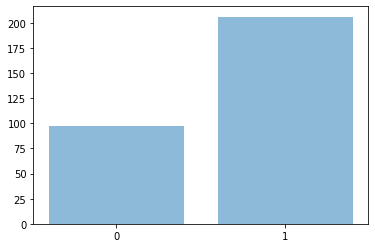

In [ ]:
# 8 - Plotar o gráfico de barras para ver a quantidade de homens e mulheres em df
# print("Quantidade de mulheres",df.sex.loc[df["sex"] == 0].value_counts()[0])
#print("Quantidade de homens",df.sex.loc[df["sex"] == 1].value_counts()[1])
# fig, ax = plt.subplots(figsize=(10,6))
# numero_linha = df.shape[0]
# sexos = dict(df.sex.value_counts())
# sexos_linha = sexos.keys
# sexos_valor = sexos.values
#df.plot(numero_linha, sexos, kind="bar", ax=ax)
# plt.bar(sexos.keys(),sexos.values())
# plt.tight_layout()

df.sex = df.sex.astype(int)
x = df.sex.value_counts().index
y = df.sex.value_counts().values

fig, ax = plt.subplots()
ax.bar(x, y, align='center', alpha=0.5)
ax.set_xticks(x)
plt.show()

Pode se entender com este gráfico que o sexo com maior chances de ter doenças cardiovasculares, são os homens. Os motivos podem ser diversos: aposentam mais tarde, são maioria em trabalhos de risco, investem pouco em saúde, etc. 

### ** 05 - Em qual idade o Colesterol Sérico e mais concentrado?**

Nesta analise exploratória agora, iremos ver em qual ponto do gráfico de dispersão existe mais correlação entre idade e o acumulo de "Colesteral Sérico".

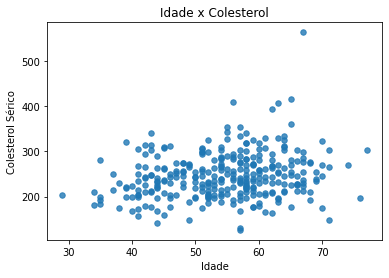

In [ ]:
# 9 - Plotar o gráfico de dispersão para as variáveis age e chol
fig, ax = plt.subplots()

# plotar median_income vs. median_house_value
ax.scatter(x='age', y='chol', data=df, s=30, alpha=0.8)
ax.set_title('Idade x Colesterol')
ax.set_xlabel("Idade")
ax.set_ylabel("Colesterol Sérico")

plt.show()

Notasse que entre **50 a 60 anos**, existe um acumulo massivo de **colesterol beirando a 400mg/dl**. Pode significar ainda hábitos alimentares ruins pelo costume de algumas pessoas de terceira idade, quererem comer tudo o que não tiveram acesso quando mais novos e com pouco poder de compra. Além de não praticarem nenhum tipo e exercicio físico para manterem a saúde, podendo ser um pensamento comum de "quererem descansar" por terem trabalhado muito quando eram mais jovens.

###**06 - Qual a frequência em mg/dl de Colesterol Sérico e encontrado nos vasos sanguineos dos pacientes?**

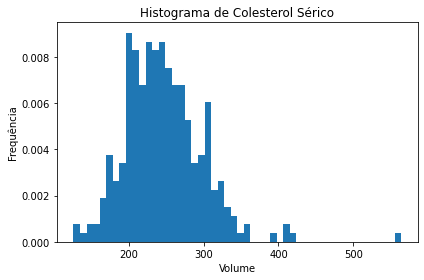

In [ ]:
# 10 - plotar um histograma para o colesterol sérico
fig, ax = plt.subplots()

df["chol"].plot(kind="hist", ax=ax, density=True,bins=50)
ax.set_title("Histograma de Colesterol Sérico")
ax.set_ylabel("Frequência")
ax.set_xlabel("Volume")

plt.tight_layout()

Os níveis de colesterol giram em torno de 200 a 300mg/dl, onde [segundo a "Sociedade Brasileira de Endocrinologia e Metabologia"](https://www.hermespardini.com.br/blog/?p=76) apontam que o valor ideal e menor do que 240mg/dl. Ficando muito propicio o paciente desenvolver doenças cardiovasculares, como hipertensão e diabetes.

###**07 - Qual a quantidade de pacientes que apresentam anomalias nos resultados de eletrocardiografia?**


*   0.0: normal
*   1.0: anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV)
*   2.0: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)

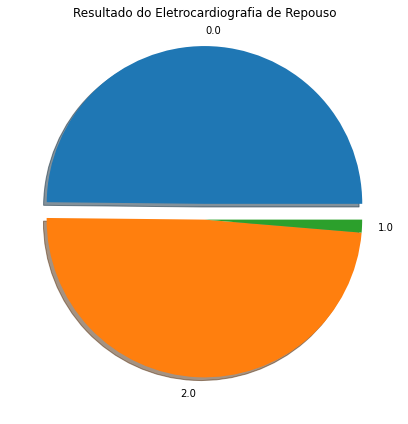

In [ ]:
# 11 - plotar um gráfico de pizza para restecg
#resultado do eletrocardiografia de repouso
#0.0: normal
#1.0: anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV)
#2.0: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)

eletrocardiografia_repouso = dict(df.restecg.value_counts())
labels = eletrocardiografia_repouso.keys()
sizes = eletrocardiografia_repouso.values()
explode = (0.1, 0, 0)

fig, ax = plt.subplots(figsize=(6,6))

ax.pie(sizes, labels=labels, explode=explode, shadow=True)
ax.set_title("Resultado do Eletrocardiografia de Repouso")

plt.tight_layout()

Maioria dos pacientes tiveram o seu resultado algo normal, mas [segundo o Dr Pedro Pinheiro](https://www.mdsaude.com/cardiologia/exame-eletrocardiograma-ecg/), os exames que apresentam "anormalidades no ST-T" podem ser indicios de infarto do miocárdio.

In [ ]:
df.restecg.value_counts()

0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64

###**08 - Qual a correlação geral de todas as variaveis do conjunto de dados?**

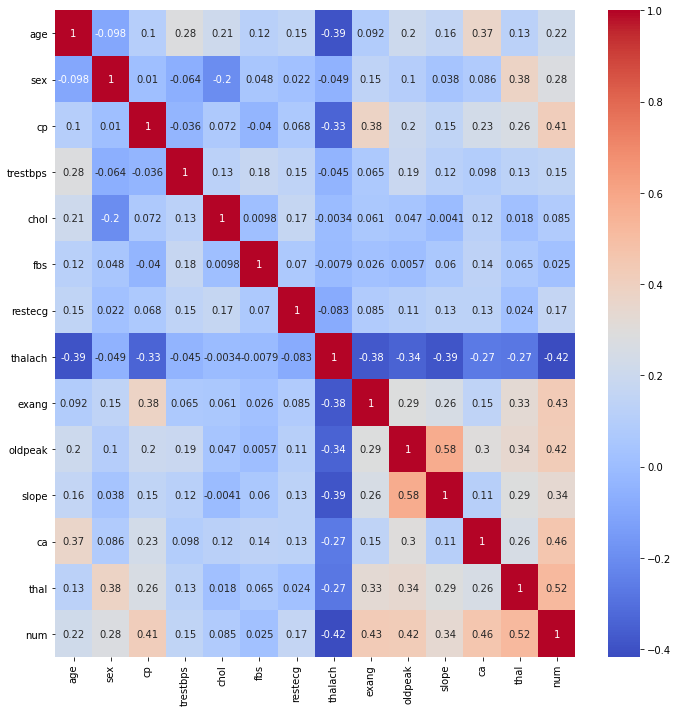

In [ ]:
# 12 - Plotar um heatmap com as correlações
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap='coolwarm')
plt.tight_layout()

## **Conclusões**


*   Mais afetados são do sexo masculino.
*   A idade com maior número vitima e dos 50 a 60 anos.
*   Neoplasia esta entre as principais causas de mortes.
*   No geral a maioria dos pacientes possuem o colesterol na casa dos 200 a 300 mg/dl, ou seja, em uma zona de risco.
*   Maioria dos exames de eletrocardiografia tem com o resultado indicios de hipertrofia ventricular.

